In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
train = pd.read_csv(r"D:\桌面\train.csv")
test = pd.read_csv(r"D:\桌面\test.csv")
full = pd.concat([train, test], axis=0, ignore_index=True)

In [4]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
full['Cabin'] = full['Cabin'].fillna('U')

In [6]:
full['Embarked'].value_counts()#查看总体乘客分别在S、C、Q上船的数量
full[(full['Survived']==1)&(full['Pclass']==1)&(full['Sex']=='female') ]['Embarked'].value_counts()#加入条件，同类中S、C、Q乘客上船的数量

Embarked
S    46
C    42
Q     1
Name: count, dtype: int64

In [7]:
full['Embarked'] = full['Embarked'].fillna('S')#填充S（方法一）
full.loc[full['Embarked'].isnull(),'Embarked'] = 'S'#填充S（方法二）

In [8]:
temp=full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['SibSp']==0) ]['Fare'].median()
full['Fare'] = full['Fare'].fillna(temp)

In [11]:
#同类中位数填充
#以Pclassm,Parch,SibSp填充大部分数据：Pclass取[1,3]
#Pclass为[1,3]的值
for i in range(1, 4):
    #取SibSp为[0,3]的值
    for j in range(0, 4):
        #Parch为[0,2]的值
        for s in range(0, 3):
                full1 = full.loc[(full['Pclass'] == i) & (full['SibSp'] == j) & (full['Parch'] == s) &(full['Age'].isnull()),'Age']
                if len(full1) == 0:1
                else:
                    large_num = full.loc[(full['Pclass'] == i) & (full['SibSp'] == j) & (full['Parch'] == s) &(full['Age'].notnull()),'Age'].median()                   
                    full.loc[(full['Pclass'] == i) & (full['SibSp'] == j) & (full['Parch'] == s) &(full['Age'].isnull()),'Age'] = large_num

In [15]:
#对于Pclass=3，Parch=2,SibSp=8的个体，采用Pclass=3，Parch=2,SibSp=5的中位数进行填补
large_age = full.loc[(full['Pclass'] == 3) & (full['SibSp'] == 5) & (full['Parch'] == 2) &(full['Age'].notnull()),'Age'].median()
print(large_age)
full.loc[(full['Pclass'] == 3) & (full['SibSp'] == 8) & (full['Parch'] == 2) &(full['Age'].isnull()),'Age'] = large_age


10.5


In [16]:
#观察到ID为1233和1256的乘客是8个孩子的父母，ID为1023的乘客是4个孩子的母亲，再通过观察同船其他乘客的数据，采用经验法对年龄缺失值进行填充
full.loc[1233,'Age'] = 45
full.loc[1256,'Age'] = 45
full.loc[1023,'Age'] = 40

In [20]:
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
print(full['Title'].value_counts())

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
Don               1
Sir               1
Lady              1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64


Title
Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: count, dtype: int64


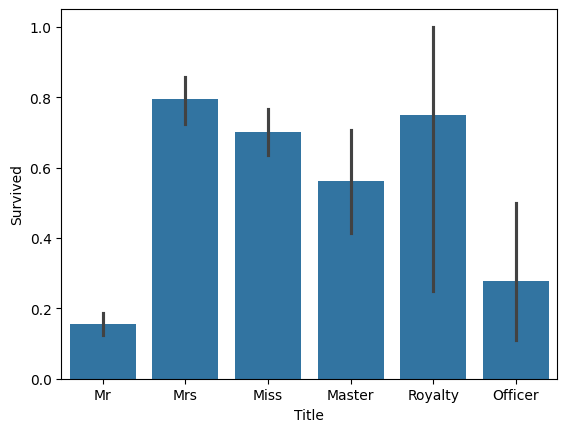

In [21]:
TitleDict={}
TitleDict['Mr'] = 'Mr'
TitleDict['Mlle'] = 'Miss'
TitleDict['Miss'] = 'Miss'
TitleDict['Master'] = 'Master'
TitleDict['Jonkheer'] = 'Master'
TitleDict['Ms'] = 'Mrs'
TitleDict['Mrs'] = 'Mrs'
TitleDict['Mme'] = 'Mrs'
TitleDict["Don"] = 'Royalty'
TitleDict["the Countess"] = 'Royalty'
TitleDict["Sir"] = 'Royalty'
TitleDict["Lady"] = 'Royalty'
TitleDict["Dona"] = 'Royalty'
TitleDict["Capt"] = 'Officer'
TitleDict["Col"] = 'Officer'
TitleDict["Major"] = 'Officer'
TitleDict["Dr"] = 'Officer'
TitleDict["Rev"] = 'Officer'
full['Title'] = full['Title'].map(TitleDict)
print(full['Title'].value_counts())
sns.barplot(data=full,x='Title',y='Survived')
plt.show()

In [22]:
temp = full['Ticket'].value_counts()
list_shareticket = temp[temp>1].index
list_shareticket = list_shareticket.tolist()
full['isTicketShared'] = 0
full.loc[full['Ticket'].isin(list_shareticket),'isTicketShared'] = 1

In [23]:
full.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,isTicketShared
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,25.0,0,0,8.0500,S,Mr,0
1305,NaN,1,female,39.0,0,0,108.9000,C,Royalty,1
1306,NaN,3,male,38.5,0,0,7.2500,S,Mr,0
1307,NaN,3,male,25.0,0,0,8.0500,S,Mr,0


In [24]:
full=pd.concat([full,pd.get_dummies(full['Sex'])],axis=1) 
full=pd.concat([full,pd.get_dummies(full['Title'])],axis=1) 
full=pd.concat([full,pd.get_dummies(full['Embarked'])],axis=1) 
full = full.drop(['Sex','Title','Embarked'],axis=1)

In [25]:
print('Age的偏度：',stats.skew(full['Age']))
print('Fare的偏度：',stats.skew(full['Fare']))

Age的偏度： 0.5254526317046072
Fare的偏度： 4.364197807821594


In [26]:
full['Fare'] = np.log(full['Fare']+0.0001)

In [32]:
x = full.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
z = full[['PassengerId','Name','Survived','Ticket','Cabin']]
x = x.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
cleaned_full = pd.concat([z,x],axis=1) 
cleaned_train = cleaned_full[cleaned_full['Survived'].notnull()]
cleaned_test = cleaned_full[cleaned_full['Survived'].isnull()]

In [33]:
cleaned_train.to_csv(r"D:\桌面\cleaned_train.csv")
cleaned_test.to_csv(r"D:\桌面\cleaned_test.csv")